In [1]:
import pandas as pd

moist = pd.read_csv('/home/pi/irrigation/test.csv')
# moist = pd.read_csv('test.csv')

In [2]:
moist.columns = ["Timetemp", "Temp", "Humidity"]
# moist

In [3]:
moist['Time'] = pd.to_datetime(moist["Timetemp"])
moist = moist.drop(columns='Timetemp')
moist.dtypes

Temp               float64
Humidity           float64
Time        datetime64[ns]
dtype: object

In [4]:
# moist['Time'].head()


In [5]:
moist = moist.set_index('Time')
# moist.head()


In [6]:
moist['Week']=moist.index.weekofyear
# moist['freq']=moist.index.freq
moist.tail()

,Temp,Humidity,Week
Time,,,
2019-06-02 15:49:31,28.5000,31.2716,22
2019-06-02 15:50:32,28.4062,31.3885,22
2019-06-02 15:51:32,28.3125,31.5778,22
2019-06-02 15:52:35,28.1562,31.1259,22
2019-06-02 15:53:40,28.1250,31.5030,22


In [7]:
# import matplotlib.pyplot as plt

# moist['Humidity'].plot()

In [8]:
moist['2019-06-01 14:00':].Humidity.plot(legend=True)
moist['2019-06-01 14:00':].Temp.plot(secondary_y=True,label='Temp',legend=True)

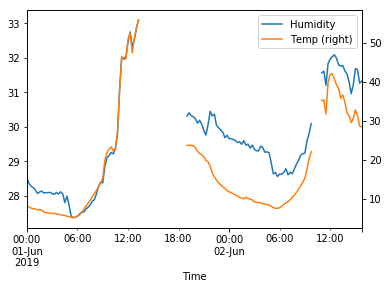

In [9]:
hourly = moist.resample('15Min').mean()
hourly['2019-06':].Humidity.plot(legend=True)
hourly['2019-06':].Temp.plot(secondary_y=True,legend=True)


                          Temp   Humidity  Week
Time                                           
2019-05-30 00:00:00  10.153076  25.940881  22.0
2019-05-30 01:00:00   9.329449  25.855866  22.0
2019-05-30 02:00:00  10.044485  25.913447  22.0
2019-05-30 03:00:00   9.645833  25.900498  22.0
2019-05-30 04:00:00   9.746289  25.905044  22.0
2019-05-30 05:00:00   8.758475  25.726234  22.0
2019-05-30 06:00:00  10.824155  25.825566  22.0
2019-05-30 07:00:00  13.196510  26.066310  22.0
2019-05-30 08:00:00  16.587929  26.338753  22.0
2019-05-30 09:00:00  22.493107  26.977258  22.0
2019-05-30 10:00:00  25.790623  27.416612  22.0
2019-05-30 11:00:00  41.583154  29.013286  22.0
2019-05-30 12:00:00  39.837922  30.508025  22.0
2019-05-30 13:00:00  41.016956  31.478724  22.0
2019-05-30 14:00:00  48.346672  32.468316  22.0
2019-05-30 15:00:00  27.237506  30.334038  22.0
2019-05-30 16:00:00  26.306144  30.071715  22.0
2019-05-30 17:00:00  25.013033  29.808722  22.0
2019-05-30 18:00:00  21.698103  29.42433

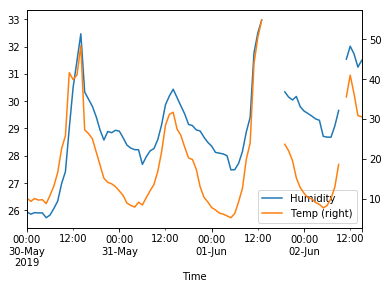

In [10]:
hourly = moist.resample('1H').mean()
hourly.dropna()
print(hourly['2019-05-30':])
hourly['2019-05-30':].Humidity.plot(legend=True)
hourly['2019-05-30':].Temp.plot(secondary_y=True,legend=True)

In [11]:
submoist=moist['2019-06-01':]
m=submoist[1:].Humidity.values
tt=submoist.index-submoist.index[0]
tt=tt[1:]
tf=tt.to_frame()
# tf
# tf.Time.values.astype('float64')
# mt=tt.astype('timedelta64[m]')
tt1=tf.Time.values.astype('float64')
# tt1
mt=tt1.reshape(-1,1)
print(mt, mt.max())
mtmro=mt.max()+(24*3600)
print(mtmro.reshape(-1,1))
# mt=tt.to_pytimedelta
# print(mt.dtype,mt)
# print( m.dtype,m)

[[  6.10000000e+10]
 [  1.22000000e+11]
 [  1.83000000e+11]
 ..., 
 [  1.43490000e+14]
 [  1.43553000e+14]
 [  1.43618000e+14]] 1.43618e+14
[[  1.43618000e+14]]


In [19]:
from sklearn import datasets, linear_model
import numpy as np
regr = linear_model.LinearRegression()
regr.fit(mt,m)
mtmro=mt.max()+(24*3600*10)
print(mt.max(), '\n',np.array(mtmro))
newmt=np.array(mtmro).reshape(-1,1)
z=regr.predict(newmt)
print('\t',newmt,'\n',z)

1.43618e+14 
 143618000864000.0
	 [[  1.43618001e+14]] 
 [ 30.97891843]


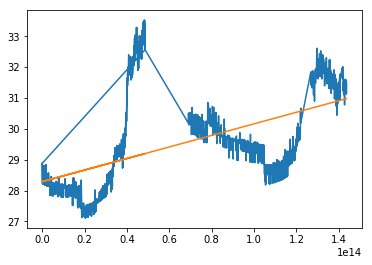

In [13]:
import matplotlib.pyplot as plt
plt.plot(mt,m)
plt.plot(mt,regr.predict(mt))